# Simulation of CCD images

With the goal of making it easier to generate simulated astronomical images, **teareduce** provides a class called `SimulateCCDExposure` that simplifies this task.

In [30]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import teareduce as tea

In [31]:
help(tea.SimulateCCDExposure)

Init signature:
tea.SimulateCCDExposure(
    naxis1=None,
    naxis2=None,
    bitpix=None,
    bias=<Quantity nan adu>,
    gain=<Quantity nan electron / adu>,
    readout_noise=<Quantity nan adu>,
    dark=<Quantity nan adu>,
    flatfield=nan,
    data_model=<Quantity nan adu>,
    seed=None,
)
Docstring:     
Simulated image generator from first principles.

CCD exposures are simulated making use of basic CCD parameters,
such as gain, readout noise, bias, dark and flat field.
A data model can also be employed to simulate more realising
CCD exposures.

The saturated pixels in 'data_model' are returned as 2**bitpix - 1
in the simulated image (for instance, 65535 when bitpix=16).

By initializing the seed of the random number generator
when instantiating this class, there is in principle no need to
use another seed for the run() method. This is useful for
generating reproducible sets of consecutive exposures. In any case,
it is also possible to provide a particular seed to the run()
m

## Simple usage

Define image basic parameters (dimensions, BITPIX)

In [11]:
naxis1, naxis2 = 5, 5
bitpix = 16

Each instance of the `SimulateCCDExposure` class becomes an image generator with the specified properties.

In [12]:
generator = tea.SimulateCCDExposure(
    naxis1=naxis1,
    naxis2=naxis2,
    bitpix=bitpix
)

The generator we have just created contains information about the image dimensions and the BITPIX value, but there are still many attributes left undefined:

In [13]:
generator

SimulateCCDExposure(
    naxis1=5,
    naxis2=5,
    bitpix=16,
    bias=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan]] adu>,
    gain=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan]] electron / adu>,
    readout_noise=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan]] adu>,
    dark=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan]] adu>,
    flatfield=array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, n

If we try to use the generator as defined so far to create a bias image, we should encounter an error message.

In [14]:
exposure_bias = generator.run(imgtype='bias')

ValueError: The parameter 'bias' contains NaN

We can see, then, that to generate a BIAS image we need to construct a generator that includes this information. For example, we can define the generator by specifying, in addition to the dimensions and BITPIX, the bias signal and the readout noise.

In [18]:
generator = tea.SimulateCCDExposure(
    naxis1=naxis1, naxis2=naxis2, bitpix=bitpix,
    bias=np.ones((naxis2, naxis1))*1000*u.adu,
    readout_noise=5*u.adu
)

generator

SimulateCCDExposure(
    naxis1=5,
    naxis2=5,
    bitpix=16,
    bias=<Quantity [[1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.]] adu>,
    gain=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan]] electron / adu>,
    readout_noise=<Quantity [[5., 5., 5., 5., 5.],
           [5., 5., 5., 5., 5.],
           [5., 5., 5., 5., 5.],
           [5., 5., 5., 5., 5.],
           [5., 5., 5., 5., 5.]] adu>,
    dark=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan]] adu>,
    flatfield=array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, 

We can then generate a simulated BIAS image using the method `run(imgtype='bias')`:


In [23]:
exposure_bias = generator.run(imgtype='bias')

The result is an object of type `SimulatedCCDResult`, which contains not only the simulated image but also all the information used to define the generator that was employed.

In [24]:
type(exposure_bias)

teareduce.simulateccdexposure.SimulatedCCDResult

In [25]:
exposure_bias

SimulatedCCDResult(
    data=array([[1000.1925808 ,  999.95628448, 1015.8905277 ,  998.41761714,
         990.688005  ],
       [ 994.19154119,  997.1899952 ,  995.04845501, 1007.12629194,
        1000.56124074],
       [ 991.2698078 , 1002.13446229,  995.93192371,  995.492847  ,
        1004.4622952 ],
       [1003.34849112,  999.94028467,  994.98692802,  994.95558936,
         994.09135437],
       [ 994.31189766,  998.99457005,  996.76275238, 1001.77777022,
        1002.23440846]]),
    unit=Unit("adu"),
    imgtype='bias',
    method='poisson',
    origin=SimulateCCDExposure(
    naxis1=5,
    naxis2=5,
    bitpix=16,
    bias=<Quantity [[1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.],
           [1000., 1000., 1000., 1000., 1000.]] adu>,
    gain=<Quantity [[nan, nan, nan, nan, nan],
           [nan, nan, nan, nan, nan],
           [nan, nan, nan, nan

The `.data` attribute contains the NumPy array with the simulated image.

In [28]:
type(exposure_bias.data)

numpy.ndarray

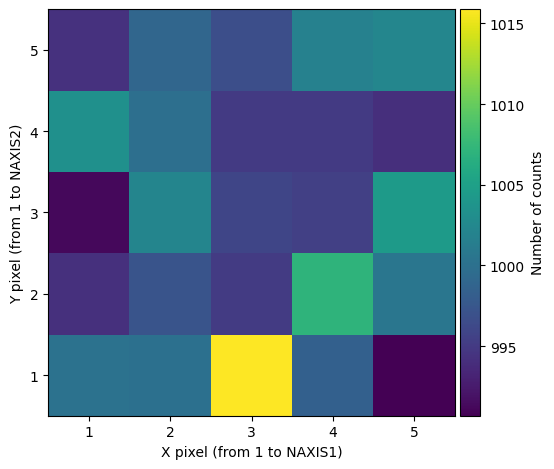

In [35]:
tea.imshowme(exposure_bias.data, ds9mode=True)
plt.tight_layout()

**Documentation pending update from this point**